In [125]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Read Data**

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [127]:
pd.set_option("display.max_columns",None) #to show all columns in dataframe

# **Reconocimiento del dataset** 

In [128]:
df_final_1 = pd.read_csv('data1.csv')
df_final_2 = pd.read_csv('data2.csv')
df_final_target = pd.read_csv('objetivo.csv')

# Une los DataFrames de entrenamiento y combina con el target
df_final = pd.concat([df_final_1, df_final_2], axis=0)
df_final = pd.merge(df_final, df_final_target, on="id")

In [129]:
df_final.shape

(59400, 41)

In [130]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

**- Conclusiones: se deben convertir algunas columnas y revisar los nulos**
- [date_recorded] es tipo object y deberiamos convertirl en datetime

- status_group es nuestra columna objetivo debe ser cambiada a numerica

- cuando se haga el preprocesado se deben convertir todas a numerico

- scheme_name tiene muchos nulos seberia eliminar

In [131]:
df_final.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

- hay varias columans con muchos nulos vamos a probar eliminando las que mas nulos tienen

- Eliminar [ funder ,installer ,public_meeting ,scheme_management ,permit]

In [132]:
df_final.duplicated().sum()

np.int64(0)

# **Limpiar Datos**

In [133]:
df_clean=df_final.copy()

> **Convert data type**

In [134]:
df_clean.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [135]:
df_clean.date_recorded=pd.to_datetime(df_clean.date_recorded)

In [136]:
df_clean.insert(loc=3,column='recorded_year',value=df_clean.date_recorded.dt.year )#year
df_clean.insert(loc=4,column='recorded_month',value=df_clean.date_recorded.dt.month )# month
df_clean.insert(loc=5,column='recorded_day',value=df_clean.date_recorded.dt.day)# day


In [137]:
df_clean.columns

Index(['id', 'amount_tsh', 'date_recorded', 'recorded_year', 'recorded_month',
       'recorded_day', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [138]:
df_clean.drop("date_recorded",axis=1,inplace=True)

In [139]:
df_clean.head()

,id,amount_tsh,recorded_year,recorded_month,recorded_day,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011,3,14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013,3,6,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013,2,25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013,1,28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011,7,13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [140]:
df_clean.public_meeting.value_counts()

public_meeting
True     51011
False     5055
Name: count, dtype: int64

In [141]:
df_clean['public_meeting']=pd.to_numeric(df_clean['public_meeting'],errors='coerce')
df_clean['permit']=pd.to_numeric(df_clean['permit'],errors='coerce')

In [142]:
#check 
df_clean[['public_meeting','permit']].dtypes

public_meeting    float64
permit            float64
dtype: object

In [143]:
#status_group it is target feature and need to convert to numercial
df_clean.status_group.value_counts()
#in our case i put if non functional=0 ,functional=1 ,functional needs repair=2

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

In [144]:
df_clean.status_group

0            functional
1            functional
2            functional
3        non functional
4            functional
              ...      
59395        functional
59396        functional
59397        functional
59398        functional
59399        functional
Name: status_group, Length: 59400, dtype: object

In [145]:
df_clean.status_group.map({'non functional':0,'functional':1,'functional needs repair':2})

0        1
1        1
2        1
3        0
4        1
        ..
59395    1
59396    1
59397    1
59398    1
59399    1
Name: status_group, Length: 59400, dtype: int64

In [146]:
df_clean.status_group=df_clean.status_group.map({'non functional':0,'functional':1,'functional needs repair':2})

In [147]:
df_clean.status_group.value_counts()

status_group
1    32259
0    22824
2     4317
Name: count, dtype: int64

In [148]:
df_clean.sample(10)

,id,amount_tsh,recorded_year,recorded_month,recorded_day,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
30918,5763,100.0,2013,1,22,Lga,340,LGA,38.800706,-10.564007,Misheni,0,Ruvuma / Southern Coast,Misheni,Mtwara,90,33,Masasi,Lukulendi,2000,1.0,GeoData Consultants Ltd,VWC,FW,1.0,1975,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
27603,23839,200.0,2011,2,25,Danida,29,DA,38.837174,-6.589262,Kwa Kilala,0,Wami / Ruvu,Shangweni,Pwani,6,1,Bagamoyo,Yombo,17,1.0,GeoData Consultants Ltd,Company,Bagamoyo Wate,1.0,1988,mono,mono,motorpump,company,commercial,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,0
30499,48403,0.0,2012,10,5,Tasaf,0,DWE,33.528890,-3.657608,Zahanati,0,Internal,Galamba,Shinyanga,17,7,Shinyanga Urban,Kolandoto,0,NaN,GeoData Consultants Ltd,Parastatal,NaN,0.0,0,other - rope pump,rope pump,rope pump,parastatal,parastatal,unknown,unknown,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2
42348,52408,0.0,2011,8,2,NaN,0,NaN,33.599049,-9.224760,Kwa Mzee Sakaveto,0,Lake Nyasa,Ighembe,Mbeya,12,4,Rungwe,Lufingo,0,1.0,GeoData Consultants Ltd,VWC,S,NaN,0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2
51407,27980,0.0,2011,4,2,World Bank,0,Commu,35.587272,-6.315447,Kwa Mboma,0,Internal,Nguji,Dodoma,1,5,Dodoma Urban,Mbabala,0,1.0,GeoData Consultants Ltd,VWC,NaN,0.0,0,afridev,afridev,handpump,vwc,user-group,never pay,never pay,salty,salty,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,0
44851,32206,100.0,2011,3,14,Government Of Tanzania,2161,Commu,33.993749,-9.267532,none,0,Lake Nyasa,Kipinga,Iringa,11,3,Makete,Iniho,0,1.0,GeoData Consultants Ltd,WUA,Kidope,0.0,1989,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1
8386,32358,200.0,2011,3,27,Dhv,273,DWE,36.895048,-7.850665,Mkwajuni,0,Rufiji,Ddc,Morogoro,5,3,Kilombero,Mang'ula,300,1.0,GeoData Consultants Ltd,WUA,Mwaya Mn,1.0,1998,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,2
34110,8059,50.0,2013,3,22,0,11,0,39.194182,-6.917449,Msikitini,0,Wami / Ruvu,Mtaa Wa Kivule,Dar es Salaam,7,2,Ilala,Kitunda,100,NaN,GeoData Consultants Ltd,WUG,J,0.0,2000,submersible,submersible,submersible,wug,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,0
7573,33903,10.0,2011,2,25,Mkuyu,316,Mkuyu,37.804247,-6.949647,Kwa King'Omela,0,Wami / Ruvu,Mafumba,Morogoro,5,2,Morogoro Rural,Mkuyuni,150,1.0,GeoData Consultants Ltd,VWC,Mkuy,1.0,1998,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,1
40798,52950,1000.0,2013,4,3,Danida,866,DWE,35.276698,-10.836671,Kwa Godmkinga,0,Ruvuma / Southern Coast,Msasani,Ruvuma,10,2,Songea Rural,Magagura,350,1.0,GeoData Consultants Ltd,VWC,Mradi wa maji wa magagura,1.0,1984,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,1


## **Manejar valores nulos**

In [149]:
round((df_clean.isna().sum()/df_clean.shape[0])*100,2)

id                        0.00
amount_tsh                0.00
recorded_year             0.00
recorded_month            0.00
recorded_day              0.00
funder                    6.12
gps_height                0.00
installer                 6.15
longitude                 0.00
latitude                  0.00
wpt_name                  0.00
num_private               0.00
basin                     0.00
subvillage                0.62
region                    0.00
region_code               0.00
district_code             0.00
lga                       0.00
ward                      0.00
population                0.00
public_meeting            5.61
recorded_by               0.00
scheme_management         6.53
scheme_name              48.50
permit                    5.14
construction_year         0.00
extraction_type           0.00
extraction_type_group     0.00
extraction_type_class     0.00
management                0.00
management_group          0.00
payment                   0.00
payment_

In [150]:
columns=df_clean.columns
drops=[]

for col in columns:
    value=round((df_clean[col].isna().sum()/df_clean.shape[0])*100,2)
    if  value >0 and value <=7: 
        drops.append(col)

print(drops)
for col in drops:
    df_clean.dropna(subset=[col],inplace=True) #to drop rows 

['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'permit']


In [151]:
round((df_clean.isna().sum()/df_clean.shape[0])*100,2)

id                        0.00
amount_tsh                0.00
recorded_year             0.00
recorded_month            0.00
recorded_day              0.00
funder                    0.00
gps_height                0.00
installer                 0.00
longitude                 0.00
latitude                  0.00
wpt_name                  0.00
num_private               0.00
basin                     0.00
subvillage                0.00
region                    0.00
region_code               0.00
district_code             0.00
lga                       0.00
ward                      0.00
population                0.00
public_meeting            0.00
recorded_by               0.00
scheme_management         0.00
scheme_name              43.73
permit                    0.00
construction_year         0.00
extraction_type           0.00
extraction_type_group     0.00
extraction_type_class     0.00
management                0.00
management_group          0.00
payment                   0.00
payment_

In [152]:
len(df_clean.scheme_name.unique())

2577

In [153]:
df_clean.scheme_name.value_counts()

scheme_name
Borehole                       543
Chalinze wate                  404
Ngana water supplied scheme    270
wanging'ombe water supply s    261
wanging'ombe supply scheme     233
                              ... 
Bl Aziz water supply             1
Mtikanga supply scheme           1
Mnazi mmoja                      1
Handeni Trunk Maini(             1
Mtawanya                         1
Name: count, Length: 2576, dtype: int64

i will imputer missing value with knn but in preprocessing process

# **EDA**

In [154]:
df_eda=df_clean.copy()

In [155]:
# drop id
df_eda.drop("id",axis=1,inplace=True)

In [156]:
categorical=df_eda.select_dtypes("O").columns
numerical =df_eda.select_dtypes(exclude="O").columns

In [157]:
categorical

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'recorded_by', 'scheme_management', 'scheme_name',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [158]:
numerical

Index(['amount_tsh', 'recorded_year', 'recorded_month', 'recorded_day',
       'gps_height', 'longitude', 'latitude', 'num_private', 'region_code',
       'district_code', 'population', 'public_meeting', 'permit',
       'construction_year', 'status_group'],
      dtype='object')

### **Univarte**

##### **Categorical**

In [159]:
for cat in categorical:
    print(cat)
    print(df_eda[cat].value_counts())
    print("*******************")

funder
funder
Government Of Tanzania    8080
Danida                    2920
Hesawa                    1388
Kkkt                      1260
World Bank                1086
                          ... 
Muwasa                       1
Msigw                        1
Overland High School         1
Kadip                        1
Brown                        1
Name: count, Length: 1586, dtype: int64
*******************
installer
installer
DWE           14637
Government     1438
RWE            1031
Commu           893
KKKT            885
              ...  
HESAWZ            1
CONCE             1
B.A.P             1
R                 1
SELEPTA           1
Name: count, Length: 1787, dtype: int64
*******************
wpt_name
wpt_name
none                  3356
Shuleni               1354
Zahanati               619
Msikitini              447
Bombani                252
                      ... 
Kwa Leonad Mteles        1
Kwa Lihawala             1
Kwa Lugano Kahenge       1
Kwa Simon Methew        

##### **numerical**

In [160]:
df_eda[numerical].describe().round(2)

,amount_tsh,recorded_year,recorded_month,recorded_day,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,permit,construction_year,status_group
count,48287.00,48287.00,48287.00,48287.00,48287.00,48287.00,48287.00,48287.00,48287.00,48287.00,48287.00,48287.00,48287.00,48287.00,48287.00
mean,360.42,2011.90,4.33,15.61,701.51,34.21,-5.70,0.55,14.79,5.75,176.69,0.91,0.69,1342.76,0.69
std,2828.47,0.96,3.00,8.70,698.81,6.33,2.87,13.29,17.24,9.70,472.51,0.29,0.46,937.15,0.60
min,0.00,2002.00,1.00,1.00,-90.00,0.00,-11.65,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,2011.00,2.00,8.00,0.00,33.04,-8.25,0.00,5.00,2.00,0.00,1.00,0.00,0.00,0.00
50%,0.00,2012.00,3.00,16.00,463.00,35.21,-4.99,0.00,12.00,3.00,30.00,1.00,1.00,1987.00,1.00
75%,50.00,2013.00,7.00,23.00,1335.00,37.36,-3.33,0.00,17.00,5.00,200.00,1.00,1.00,2005.00,1.00
max,250000.00,2013.00,12.00,31.00,2770.00,40.32,-0.00,1776.00,99.00,80.00,30500.00,1.00,1.00,2013.00,2.00


**Notas: **

1) Estan raros los cuartiles de  amount_tsh , num_private , population

2) Usar correlation 

In [161]:
fig = px.histogram(x=df_eda['amount_tsh'])
fig.show()

In [162]:
df_eda['amount_tsh'].quantile([0.50,0.70,0.80,0.90,0.95,0.99,0.990,.995,.999,1]).to_frame().T

,0.500,0.700,0.800,0.900,0.950,0.990,0.990,0.995,0.999,1.000
amount_tsh,0.0,20.0,100.0,500.0,2000.0,5000.0,5000.0,8000.0,20000.0,250000.0


In [163]:
df_eda[df_eda.amount_tsh>=8000]

,amount_tsh,recorded_year,recorded_month,recorded_day,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
194,25000.0,2011,4,14,Secondary Schoo,1768,secondary school,34.716010,-9.129740,Head Master,0,Rufiji,Sadani,Iringa,11,4,Njombe,Mdandu,25,1.0,GeoData Consultants Ltd,WUA,wanging'ombe water supply s,1.0,1987,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,1
543,40000.0,2011,2,23,Idc,1711,DWE,35.408794,-8.112945,none,0,Rufiji,Ulete,Iringa,11,1,Iringa Rural,Ifunda,430,1.0,GeoData Consultants Ltd,VWC,Muwimb,1.0,2010,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1
559,12000.0,2013,2,25,Japan,1020,DWE,35.348101,-9.891586,Kwa Magreth,0,Lake Nyasa,Lituta,Ruvuma,10,2,Songea Rural,Mahanje,0,1.0,GeoData Consultants Ltd,VWC,Mradi wa maji wa mahanje,1.0,2002,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,2
993,20000.0,2013,9,3,Oxfam,1540,DWE,36.686221,-3.339980,Kwa Longololi,0,Pangani,Ikenywa,Arusha,2,2,Arusha Rural,Oltroto,150,1.0,GeoData Consultants Ltd,VWC,Nabaiye pipe line,1.0,1995,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe,1
1342,12000.0,2013,2,25,Japan,1007,DWE,35.351222,-9.893956,Kwa Zaina,0,Lake Nyasa,Mnadani,Ruvuma,10,2,Songea Rural,Mahanje,0,1.0,GeoData Consultants Ltd,VWC,Mradi wa maji wa mahanje,1.0,2002,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58283,20000.0,2013,9,3,Oxfam,1537,DWE,36.685552,-3.337501,Kanisani,0,Pangani,Ikenywa,Arusha,2,2,Arusha Rural,Oltroto,150,1.0,GeoData Consultants Ltd,VWC,Nabaiye pipe line,1.0,1995,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1
58313,20000.0,2013,9,3,Oxfam,1498,DWE,36.683108,-3.343116,Kwa Sheheli,0,Pangani,Ikenywa,Arusha,2,2,Arusha Rural,Oltroto,300,1.0,GeoData Consultants Ltd,VWC,Nabaiye pipe line,1.0,1995,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe,1
58566,25000.0,2011,3,24,Secondary,1992,secondary,34.615714,-9.234618,Philip Mangula Secondary,0,Rufiji,Amani,Iringa,11,4,Njombe,Imalinyi,176,1.0,GeoData Consultants Ltd,WUA,imalinyi supply scheme,1.0,2009,gravity,gravity,gravity,wua,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,1
58921,10000.0,2013,7,4,Government Of Tanzania,1365,DWE,36.485163,-3.379574,Olesiraa,0,Internal,Olesiraa,Arusha,2,2,Arusha Rural,Kisongo,100,1.0,GeoData Consultants Ltd,VWC,Monduli pipe line,1.0,2008,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,1


Drop all rows greather than or equal 8000 (95%)

In [164]:
df_eda.drop(df_eda[df_eda.amount_tsh>=8000].index,inplace=True)

<Axes: xlabel='num_private', ylabel='Count'>

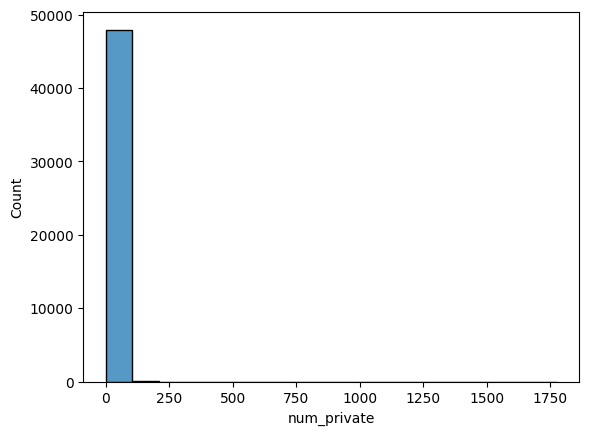

In [165]:
sns.histplot(x=df_eda['num_private'])

In [166]:
df_eda['num_private'].quantile([0.95,0.99,0.990,.995,.999,1]).to_frame().T

,0.950,0.990,0.990,0.995,0.999,1.000
num_private,0.0,6.0,6.0,32.0,93.0,1776.0


In [167]:
df_eda[df_eda['num_private']>93]

,amount_tsh,recorded_year,recorded_month,recorded_day,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
727,20.0,2013,2,14,Muwsa,895,MUWSA,37.340287,-3.320053,Mapendo Kiosk,698,Pangani,Sabasaba Street,Kilimanjaro,3,6,Moshi Urban,Rau,12,1.0,GeoData Consultants Ltd,Water authority,NaN,1.0,2004,submersible,submersible,submersible,water authority,commercial,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,1
1752,5000.0,2011,2,26,Wsdp,126,Wachina,38.865690,-6.830542,Mzee Elias,102,Wami / Ruvu,Bomu,Pwani,6,2,Kibaha,Soga,20,1.0,GeoData Consultants Ltd,Parastatal,upper Ruvu,1.0,2010,mono,mono,motorpump,private operator,commercial,pay monthly,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,1
2535,50.0,2011,2,24,Wsdp,110,Wachina,38.864156,-6.830873,Ofisini,120,Wami / Ruvu,Bomu,Pwani,6,2,Kibaha,Soga,20,1.0,GeoData Consultants Ltd,VWC,Upper Ruvu,1.0,2010,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,0
2713,20.0,2013,2,18,Muwsa,884,MUWSA,37.299481,-3.347322,Msumbiji,213,Pangani,Bonite Street,Kilimanjaro,3,6,Moshi Urban,Karanga,17,1.0,GeoData Consultants Ltd,Water authority,Shirimatunda water Supply,1.0,2008,gravity,gravity,gravity,water authority,commercial,pay per bucket,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,0
3383,0.0,2013,2,3,Government Of Tanzania,1247,Government,34.859036,-10.752450,Kwa Mzee Sikitiko,141,Lake Nyasa,Igunga,Ruvuma,10,3,Mbinga,Matiri,40,1.0,GeoData Consultants Ltd,VWC,Government,1.0,2005,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,1
4244,200.0,2013,7,3,Unicef,845,Government,34.921073,-10.538000,Kwa Mzee Nkwera,131,Lake Nyasa,Senta 'B',Ruvuma,10,3,Mbinga,Ruanda,86,1.0,GeoData Consultants Ltd,VWC,Government,1.0,2002,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1
5926,50.0,2011,2,24,Private,128,Wachina,38.864401,-6.830304,Kwa Mzee Rashidi,102,Wami / Ruvu,Bomu,Pwani,6,2,Kibaha,Soga,20,1.0,GeoData Consultants Ltd,Parastatal,Upper ruvu,1.0,2010,gravity,gravity,gravity,unknown,unknown,pay per bucket,per bucket,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,0
8940,50.0,2011,2,27,Wsdp,117,Wachina,38.867156,-6.829514,Unknown,102,Wami / Ruvu,Bomu,Pwani,6,2,Kibaha,Soga,50,1.0,GeoData Consultants Ltd,VWC,upper Ruvu,1.0,1986,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,0
11610,50.0,2011,2,24,Nordic,109,DWE,38.865831,-6.827570,Kwa Kihemba,102,Wami / Ruvu,Bomu,Pwani,6,2,Kibaha,Soga,100,1.0,GeoData Consultants Ltd,VWC,Borehole,1.0,2008,nira/tanira,nira/tanira,handpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,river,river/lake,surface,other,other,0
11703,50.0,2011,3,25,District Council,303,Handeni Trunk Main(,38.547996,-5.332984,Kwa Fundi Rama,180,Pangani,Misufini,Tanga,4,6,Handeni,Segera,1500,1.0,GeoData Consultants Ltd,VWC,Handeni Trunk Main(H,1.0,1980,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,river,river/lake,surface,communal standpipe,commu

In [168]:
df_eda[df_eda['num_private']>93].shape

(43, 42)

In [169]:
df_eda.drop(df_eda[df_eda['num_private']>93].index,inplace=True)

In [170]:
px.histogram(x=df_eda['population'])

In [171]:
df_eda['population'].quantile([0,0.40,0.50,0.70,0.80,0.90,0.95,0.99,0.990,.995,.999,1]).to_frame().T

,0.000,0.400,0.500,0.700,0.800,0.900,0.950,0.990,0.990,0.995,0.999,1.000
population,0.0,1.0,30.0,150.0,250.0,450.0,650.0,1871.58,1871.58,2830.94,6802.106,30500.0


In [172]:
df_eda[df_eda['population']>df_eda['population'].quantile(0.999)]

,amount_tsh,recorded_year,recorded_month,recorded_day,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
869,50.0,2011,2,26,Private,43,Private,39.288309,-6.976190,Sheri,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,1.0,GeoData Consultants Ltd,Private operator,NaN,0.0,2010,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
3853,100.0,2013,3,15,Songea Municipal Counci,1043,MWE,35.639531,-10.686042,Kwa Kaisi,0,Ruvuma / Southern Coast,Mburani,Ruvuma,10,4,Songea Urban,Ruvuma,7500,0.0,GeoData Consultants Ltd,Other,NaN,1.0,2010,india mark ii,india mark ii,handpump,other,other,pay per bucket,per bucket,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,1
4905,1000.0,2011,3,16,Mkinga Distric Cou,0,DWE,38.802204,-4.867177,Tank Kuu,0,Pangani,Sokoni,Tanga,4,8,Mkinga,Maramba,7000,1.0,GeoData Consultants Ltd,VWC,Maramba gravity spri,1.0,1970,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,1
5262,50.0,2011,2,26,Private,28,Private,39.286124,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,1.0,GeoData Consultants Ltd,Private operator,NaN,0.0,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
6228,50.0,2011,2,26,Private,42,Private,39.290734,-6.971157,Kwa Mama Hadija,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,1.0,GeoData Consultants Ltd,Private operator,NaN,0.0,2008,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
8779,30.0,2011,2,26,Jaica,49,JAICA,39.294443,-6.976232,Kwa Mjumbe Mkemi,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,1.0,GeoData Consultants Ltd,VWC,NaN,0.0,2010,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,1
9021,10.0,2013,7,3,Germany Republi,904,CES,37.101187,-3.400788,Area 16 Namba 6,0,Pangani,Parestina,Kilimanjaro,3,5,Hai,Masama Rundugai,8000,1.0,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,1.0,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1
9681,30.0,2011,2,26,Jaica,37,JAICA,39.287767,-6.974183,Mgengeni,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,1.0,GeoData Consultants Ltd,VWC,NaN,0.0,2010,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,1
10955,0.0,2011,2,26,Private,33,Private,39.289092,-6.974045,Kwa Bofu,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,1.0,GeoData Consultants Ltd,Private operator,NaN,0.0,2010,submersible,submersible,submersible,private operator,commercial,never pay,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0
12784,0.0,2013,3,26,0,39,0,39.056695,-6.721698,Kifwani,0,Wami / Ruvu,Mpigi Magoe,Dar es Salaam,7,1,Kinondoni,Mbezi,9865,1.0,GeoData Consultants Ltd,VWC,NaN,0.0,2010,submersible,submersible,submersib

In [173]:
df_eda[df_eda['population']>df_eda['population'].quantile(0.999)].shape

(48, 42)

Drop all rows greather than 6802.052 (99.9%)


In [174]:
df_eda.drop(df_eda[df_eda['population']>df_eda['population'].quantile(0.999)].index,inplace=True)

------------------------------

#### **Correlation**

In [175]:
nomerical=df_eda.select_dtypes(exclude="O").columns.tolist()
nomerical

['amount_tsh',
 'recorded_year',
 'recorded_month',
 'recorded_day',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'public_meeting',
 'permit',
 'construction_year',
 'status_group']

In [176]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47914 entries, 0 to 59399
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             47914 non-null  float64
 1   recorded_year          47914 non-null  int32  
 2   recorded_month         47914 non-null  int32  
 3   recorded_day           47914 non-null  int32  
 4   funder                 47914 non-null  object 
 5   gps_height             47914 non-null  int64  
 6   installer              47914 non-null  object 
 7   longitude              47914 non-null  float64
 8   latitude               47914 non-null  float64
 9   wpt_name               47912 non-null  object 
 10  num_private            47914 non-null  int64  
 11  basin                  47914 non-null  object 
 12  subvillage             47914 non-null  object 
 13  region                 47914 non-null  object 
 14  region_code            47914 non-null  int64  
 15  distric

In [177]:
#correlation all nomerical features with together
df_eda.corr(nomerical)

ValueError: could not convert string to float: 'Roman'

In [ ]:
sns.heatmap(df_eda.corr())

ValueError: could not convert string to float: 'Roman'

In [ ]:
#correlation all nomerical features with target feauter
df_eda.corrwith(df_eda.status_group).reset_index().rename(columns={'index':'features',0:"target"}).sort_values(by='target',ascending=False)

ValueError: could not convert string to float: 'Roman'

**Note from corelation:**

**there is not strong corelation between all features together or all features and target**

# **preprocessing**

Some steps we will do in this process :

1- split data to train and test

2-use binary encoder , starnderscaler , fill missing value

3- using pipline

4- imblance 

In [ ]:
df_pre=df_eda.copy()

In [ ]:
df_pre.head()

,amount_tsh,recorded_year,recorded_month,recorded_day,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,2011,3,14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,1.0,GeoData Consultants Ltd,VWC,Roman,0.0,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1
2,25.0,2013,2,25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,1.0,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,1.0,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,1
3,0.0,2013,1,28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,1.0,GeoData Consultants Ltd,VWC,NaN,1.0,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0
5,20.0,2011,3,13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,1.0,GeoData Consultants Ltd,VWC,Zingibali,1.0,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,1
6,0.0,2012,10,1,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,1.0,GeoData Consultants Ltd,VWC,NaN,1.0,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,0


In [ ]:
df_pre.status_group.value_counts(normalize=True)*100 # as precentage

1    54.698946
0    38.029845
2     7.271209
Name: status_group, dtype: float64

In [ ]:
df_pre.scheme_name.unique()


array(['Roman', 'Nyumba ya mungu pipe scheme', nan, ..., 'BL Nsherehehe',
       'Magati  gravity spri', 'Mtawanya'], dtype=object)

In [ ]:
X=df_pre.drop('status_group',axis=1)
y=df_pre.status_group

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=df_pre['status_group'])#to handling imbalnce probelm

In [ ]:
X_train.shape

(32103, 41)

In [ ]:
y_train.value_counts(normalize=True)*100

1    54.698938
0    38.030714
2     7.270349
Name: status_group, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)*100

1    54.698963
0    38.028080
2     7.272957
Name: status_group, dtype: float64

In [ ]:
cat_cols=df_pre.select_dtypes(include="O").columns
num_cols=df_pre.select_dtypes(exclude="O").columns.drop('status_group')

In [ ]:
df_pre.isna().sum()

amount_tsh                   0
recorded_year                0
recorded_month               0
recorded_day                 0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                   0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management            0
scheme_name              20387
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [ ]:
df_pre["scheme_name"].value_counts()

None                           640
Borehole                       540
Chalinze wate                  394
Ngana water supplied scheme    270
wanging'ombe water supply s    255
                              ... 
Villagers                        1
KKKT Water Project               1
Kilimani water scheme            1
Shirimatunda                     1
Mtawanya                         1
Name: scheme_name, Length: 2561, dtype: int64

In [ ]:
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler


enc = BinaryEncoder()
sc = StandardScaler()


ct = ColumnTransformer(
    [
        ('encoding' , enc , cat_cols ) ,
        ('scaling' , sc , num_cols),
    ]
)

X_train_prep=ct.fit_transform(X_train)
X_test_prep=ct.transform(X_test)

In [ ]:
X_train_prep

array([[ 0.        ,  0.        ,  0.        , ...,  0.31655814,
        -1.48100476,  0.71358572],
       [ 0.        ,  0.        ,  0.        , ...,  0.31655814,
         0.67521727,  0.71571505],
       [ 0.        ,  0.        ,  0.        , ...,  0.31655814,
         0.67521727, -1.42319514],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.31655814,
        -1.48100476, -1.42319514],
       [ 0.        ,  0.        ,  0.        , ...,  0.31655814,
        -1.48100476,  0.71358572],
       [ 0.        ,  0.        ,  0.        , ...,  0.31655814,
         0.67521727, -1.42319514]])

# **Saving Data preprocessing**

In [ ]:
yy_train=y_train.reset_index().drop("index",axis=1)
yy_train=yy_train.reset_index()
yy_train

,index,status_group
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
32098,32098,2
32099,32099,1
32100,32100,1
32101,32101,1


In [ ]:
yy_test=y_test.reset_index().drop("index",axis=1)
yy_test=yy_test.reset_index()
yy_test

,index,status_group
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0
...,...,...
15807,15807,0
15808,15808,1
15809,15809,1
15810,15810,0


In [ ]:
df_train=pd.DataFrame(X_train_prep,columns=ct.get_feature_names_out()).reset_index()
df_test=pd.DataFrame(X_test_prep,columns=ct.get_feature_names_out()).reset_index()

In [ ]:
df_train

,index,encoding__funder_0,encoding__funder_1,encoding__funder_2,encoding__funder_3,encoding__funder_4,encoding__funder_5,encoding__funder_6,encoding__funder_7,encoding__funder_8,encoding__funder_9,encoding__funder_10,encoding__installer_0,encoding__installer_1,encoding__installer_2,encoding__installer_3,encoding__installer_4,encoding__installer_5,encoding__installer_6,encoding__installer_7,encoding__installer_8,encoding__installer_9,encoding__installer_10,encoding__wpt_name_0,encoding__wpt_name_1,encoding__wpt_name_2,encoding__wpt_name_3,encoding__wpt_name_4,encoding__wpt_name_5,encoding__wpt_name_6,encoding__wpt_name_7,encoding__wpt_name_8,encoding__wpt_name_9,encoding__wpt_name_10,encoding__wpt_name_11,encoding__wpt_name_12,encoding__wpt_name_13,encoding__wpt_name_14,encoding__basin_0,encoding__basin_1,encoding__basin_2,encoding__basin_3,encoding__subvillage_0,encoding__subvillage_1,encoding__subvillage_2,encoding__subvillage_3,encoding__subvillage_4,encoding__subvillage_5,encoding__subvillage_6,encoding__subvillage_7,encoding__subvillage_8,encoding__subvillage_9,encoding__subvillage_10,encoding__subvillage_11,encoding__subvillage_12,encoding__subvillage_13,encoding__region_0,encoding__region_1,encoding__region_2,encoding__region_3,encoding__region_4,encoding__lga_0,encoding__lga_1,encoding__lga_2,encoding__lga_3,encoding__lga_4,encoding__lga_5,encoding__lga_6,encoding__ward_0,encoding__ward_1,encoding__ward_2,encoding__ward_3,encoding__ward_4,encoding__ward_5,encoding__ward_6,encoding__ward_7,encoding__ward_8,encoding__ward_9,encoding__ward_10,encoding__recorded_by_0,encoding__scheme_management_0,encoding__scheme_management_1,encoding__scheme_management_2,encoding__scheme_management_3,encoding__scheme_name_0,encoding__scheme_name_1,encoding__scheme_name_2,encoding__scheme_name_3,encoding__scheme_name_4,encoding__scheme_name_5,encoding__scheme_name_6,encoding__scheme_name_7,encoding__scheme_name_8,encoding__scheme_name_9,encoding__scheme_name_10,encoding__scheme_name_11,encoding__extraction_type_0,encoding__extraction_type_1,encoding__extraction_type_2,encoding__extraction_type_3,encoding__extraction_type_4,encoding__extraction_type_group_0,encoding__extraction_type_group_1,encoding__extraction_type_group_2,encoding__extraction_type_group_3,encoding__extraction_type_class_0,encoding__extraction_type_class_1,encoding__extraction_type_class_2,encoding__management_0,encoding__management_1,encoding__management_2,encoding__management_3,encoding__management_group_0,encoding__management_group_1,encoding__management_group_2,encoding__payment_0,encoding__payment_1,encoding__payment_2,encoding__payment_type_0,encoding__payment_type_1,encoding__payment_type_2,encoding__water_quality_0,encoding__water_quality_1,encoding__water_quality_2,encoding__water_quality_3,encoding__quality_group_0,encoding__quality_group_1,encoding__quality_group_2,encoding__quantity_0,encoding__quantity_1,encoding__quantity_2,encoding__quantity_group_0,encoding__quantity_group_1,encoding__quantity_group_2,encoding__source_0,encoding__source_1,encoding__source_2,encoding__source_3,encoding__source_type_0,encoding__source_type_1,encoding__source_type_2,encoding__source_class_0,encoding__source_class_1,encoding__waterpoint_type_0,encoding__waterpoint_type_1,encoding__waterpoint_type_2,encoding__waterpoint_type_group_0,encoding__waterpoint_type_group_1,encoding__waterpoint_type_group_2,scaling__amount_tsh,scaling__recorded_year,scaling__recorded_month,scaling__recorded_day,scaling__gps_height,scaling__longitude,scaling__latitude,scaling__num_private,scaling__region_code,scaling__district_code,scaling__population,scaling__public_meeting,scaling__permit,scaling__construction_year
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
df_train=df_train.merge(yy_train)
df_train

,index,encoding__funder_0,encoding__funder_1,encoding__funder_2,encoding__funder_3,encoding__funder_4,encoding__funder_5,encoding__funder_6,encoding__funder_7,encoding__funder_8,encoding__funder_9,encoding__funder_10,encoding__installer_0,encoding__installer_1,encoding__installer_2,encoding__installer_3,encoding__installer_4,encoding__installer_5,encoding__installer_6,encoding__installer_7,encoding__installer_8,encoding__installer_9,encoding__installer_10,encoding__wpt_name_0,encoding__wpt_name_1,encoding__wpt_name_2,encoding__wpt_name_3,encoding__wpt_name_4,encoding__wpt_name_5,encoding__wpt_name_6,encoding__wpt_name_7,encoding__wpt_name_8,encoding__wpt_name_9,encoding__wpt_name_10,encoding__wpt_name_11,encoding__wpt_name_12,encoding__wpt_name_13,encoding__wpt_name_14,encoding__basin_0,encoding__basin_1,encoding__basin_2,encoding__basin_3,encoding__subvillage_0,encoding__subvillage_1,encoding__subvillage_2,encoding__subvillage_3,encoding__subvillage_4,encoding__subvillage_5,encoding__subvillage_6,encoding__subvillage_7,encoding__subvillage_8,encoding__subvillage_9,encoding__subvillage_10,encoding__subvillage_11,encoding__subvillage_12,encoding__subvillage_13,encoding__region_0,encoding__region_1,encoding__region_2,encoding__region_3,encoding__region_4,encoding__lga_0,encoding__lga_1,encoding__lga_2,encoding__lga_3,encoding__lga_4,encoding__lga_5,encoding__lga_6,encoding__ward_0,encoding__ward_1,encoding__ward_2,encoding__ward_3,encoding__ward_4,encoding__ward_5,encoding__ward_6,encoding__ward_7,encoding__ward_8,encoding__ward_9,encoding__ward_10,encoding__recorded_by_0,encoding__scheme_management_0,encoding__scheme_management_1,encoding__scheme_management_2,encoding__scheme_management_3,encoding__scheme_name_0,encoding__scheme_name_1,encoding__scheme_name_2,encoding__scheme_name_3,encoding__scheme_name_4,encoding__scheme_name_5,encoding__scheme_name_6,encoding__scheme_name_7,encoding__scheme_name_8,encoding__scheme_name_9,encoding__scheme_name_10,encoding__scheme_name_11,encoding__extraction_type_0,encoding__extraction_type_1,encoding__extraction_type_2,encoding__extraction_type_3,encoding__extraction_type_4,encoding__extraction_type_group_0,encoding__extraction_type_group_1,encoding__extraction_type_group_2,encoding__extraction_type_group_3,encoding__extraction_type_class_0,encoding__extraction_type_class_1,encoding__extraction_type_class_2,encoding__management_0,encoding__management_1,encoding__management_2,encoding__management_3,encoding__management_group_0,encoding__management_group_1,encoding__management_group_2,encoding__payment_0,encoding__payment_1,encoding__payment_2,encoding__payment_type_0,encoding__payment_type_1,encoding__payment_type_2,encoding__water_quality_0,encoding__water_quality_1,encoding__water_quality_2,encoding__water_quality_3,encoding__quality_group_0,encoding__quality_group_1,encoding__quality_group_2,encoding__quantity_0,encoding__quantity_1,encoding__quantity_2,encoding__quantity_group_0,encoding__quantity_group_1,encoding__quantity_group_2,encoding__source_0,encoding__source_1,encoding__source_2,encoding__source_3,encoding__source_type_0,encoding__source_type_1,encoding__source_type_2,encoding__source_class_0,encoding__source_class_1,encoding__waterpoint_type_0,encoding__waterpoint_type_1,encoding__waterpoint_type_2,encoding__waterpoint_type_group_0,encoding__waterpoint_type_group_1,encoding__waterpoint_type_group_2,scaling__amount_tsh,scaling__recorded_year,scaling__recorded_month,scaling__recorded_day,scaling__gps_height,scaling__longitude,scaling__latitude,scaling__num_private,scaling__region_code,scaling__district_code,scaling__population,scaling__public_meeting,scaling__permit,scaling__construction_year,status_group
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,

In [ ]:
df_test=df_test.merge(yy_test)
df_test

,index,encoding__funder_0,encoding__funder_1,encoding__funder_2,encoding__funder_3,encoding__funder_4,encoding__funder_5,encoding__funder_6,encoding__funder_7,encoding__funder_8,encoding__funder_9,encoding__funder_10,encoding__installer_0,encoding__installer_1,encoding__installer_2,encoding__installer_3,encoding__installer_4,encoding__installer_5,encoding__installer_6,encoding__installer_7,encoding__installer_8,encoding__installer_9,encoding__installer_10,encoding__wpt_name_0,encoding__wpt_name_1,encoding__wpt_name_2,encoding__wpt_name_3,encoding__wpt_name_4,encoding__wpt_name_5,encoding__wpt_name_6,encoding__wpt_name_7,encoding__wpt_name_8,encoding__wpt_name_9,encoding__wpt_name_10,encoding__wpt_name_11,encoding__wpt_name_12,encoding__wpt_name_13,encoding__wpt_name_14,encoding__basin_0,encoding__basin_1,encoding__basin_2,encoding__basin_3,encoding__subvillage_0,encoding__subvillage_1,encoding__subvillage_2,encoding__subvillage_3,encoding__subvillage_4,encoding__subvillage_5,encoding__subvillage_6,encoding__subvillage_7,encoding__subvillage_8,encoding__subvillage_9,encoding__subvillage_10,encoding__subvillage_11,encoding__subvillage_12,encoding__subvillage_13,encoding__region_0,encoding__region_1,encoding__region_2,encoding__region_3,encoding__region_4,encoding__lga_0,encoding__lga_1,encoding__lga_2,encoding__lga_3,encoding__lga_4,encoding__lga_5,encoding__lga_6,encoding__ward_0,encoding__ward_1,encoding__ward_2,encoding__ward_3,encoding__ward_4,encoding__ward_5,encoding__ward_6,encoding__ward_7,encoding__ward_8,encoding__ward_9,encoding__ward_10,encoding__recorded_by_0,encoding__scheme_management_0,encoding__scheme_management_1,encoding__scheme_management_2,encoding__scheme_management_3,encoding__scheme_name_0,encoding__scheme_name_1,encoding__scheme_name_2,encoding__scheme_name_3,encoding__scheme_name_4,encoding__scheme_name_5,encoding__scheme_name_6,encoding__scheme_name_7,encoding__scheme_name_8,encoding__scheme_name_9,encoding__scheme_name_10,encoding__scheme_name_11,encoding__extraction_type_0,encoding__extraction_type_1,encoding__extraction_type_2,encoding__extraction_type_3,encoding__extraction_type_4,encoding__extraction_type_group_0,encoding__extraction_type_group_1,encoding__extraction_type_group_2,encoding__extraction_type_group_3,encoding__extraction_type_class_0,encoding__extraction_type_class_1,encoding__extraction_type_class_2,encoding__management_0,encoding__management_1,encoding__management_2,encoding__management_3,encoding__management_group_0,encoding__management_group_1,encoding__management_group_2,encoding__payment_0,encoding__payment_1,encoding__payment_2,encoding__payment_type_0,encoding__payment_type_1,encoding__payment_type_2,encoding__water_quality_0,encoding__water_quality_1,encoding__water_quality_2,encoding__water_quality_3,encoding__quality_group_0,encoding__quality_group_1,encoding__quality_group_2,encoding__quantity_0,encoding__quantity_1,encoding__quantity_2,encoding__quantity_group_0,encoding__quantity_group_1,encoding__quantity_group_2,encoding__source_0,encoding__source_1,encoding__source_2,encoding__source_3,encoding__source_type_0,encoding__source_type_1,encoding__source_type_2,encoding__source_class_0,encoding__source_class_1,encoding__waterpoint_type_0,encoding__waterpoint_type_1,encoding__waterpoint_type_2,encoding__waterpoint_type_group_0,encoding__waterpoint_type_group_1,encoding__waterpoint_type_group_2,scaling__amount_tsh,scaling__recorded_year,scaling__recorded_month,scaling__recorded_day,scaling__gps_height,scaling__longitude,scaling__latitude,scaling__num_private,scaling__region_code,scaling__district_code,scaling__population,scaling__public_meeting,scaling__permit,scaling__construction_year,status_group
0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,

In [ ]:
df_train.drop("index",axis=1,inplace=True)
df_test.drop("index",axis=1,inplace=True)

In [ ]:
#save
df_train.to_csv("df_train.csv",index=False)
df_test.to_csv("df_test.csv",index=False)

# **Model**

In [ ]:
#Baics model
from sklearn.linear_model import LogisticRegression

basic=LogisticRegression()
basic.fit(X_train_prep,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
print(basic.score(X_test_prep,y_test))

0.7401973184922843


In [ ]:
#using polynomial and hyperparameter
'''
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
#first make pipeline with model and PolynomialFeatures together
pipe=Pipeline(steps=[
                    ("ploy",PolynomialFeatures()),
                    ("log",LogisticRegression())
                    ])
#all possible paramter to select hyperparameter with best one
parameter_log={"ploy__degree":[2,3,4],
                "log__tol":[0.001,0.0001,0.00001],
               "log__C":[1,2,3,4]}

log=RandomizedSearchCV(estimator=pipe,param_distributions=parameter_log,cv=3)

#fit
log.fit(X_train_prep,y_train)
'''

'\nfrom sklearn.preprocessing import PolynomialFeatures\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.pipeline import Pipeline\n#first make pipeline with model and PolynomialFeatures together\npipe=Pipeline(steps=[\n                    ("ploy",PolynomialFeatures()),\n                    ("log",LogisticRegression())\n                    ])\n#all possible paramter to select hyperparameter with best one\nparameter_log={"ploy__degree":[2,3,4],\n                "log__tol":[0.001,0.0001,0.00001],\n               "log__C":[1,2,3,4]}\n\nlog=RandomizedSearchCV(estimator=pipe,param_distributions=parameter_log,cv=3)\n\n#fit\nlog.fit(X_train_prep,y_train)\n'

I can't run this code because this code had been load in kaggle and kaggle want me to purchase service of google cloud ,so i keep work in my local enviroment (jupyter) and upload code in my github account 